<a href="https://colab.research.google.com/github/everestso/summer25/blob/main/c166f25_MDP_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

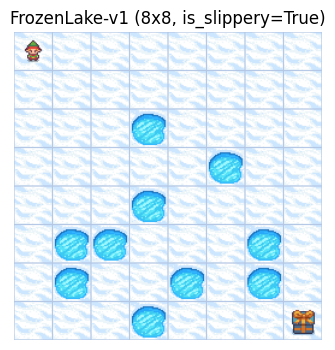

In [1]:
# Colab setup (install gymnasium if needed)
!pip install gymnasium matplotlib numpy --quiet

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def frozen_lake_image(map_name="4x4", is_slippery=True, seed=None):
    """
    Create a FrozenLake-v1 env and display the domain inline in Colab.
    """
    try:
        # Try RGB rendering (newer gymnasium)
        env = gym.make("FrozenLake-v1", map_name=map_name, is_slippery=is_slippery, render_mode="rgb_array")
        env.reset(seed=seed)
        frame = env.render()
        env.close()
        img = frame
    except Exception:
        # Fallback: build from ASCII map
        env = gym.make("FrozenLake-v1", map_name=map_name, is_slippery=is_slippery)
        env.reset(seed=seed)
        desc = np.asarray(env.unwrapped.desc, dtype="U1")
        env.close()

        color_map = {
            'S': [144, 238, 144],  # Start
            'F': [173, 216, 230],  # Frozen
            'H': [0, 0, 0],        # Hole
            'G': [255, 215, 0],    # Goal
        }

        h, w = desc.shape
        img = np.zeros((h, w, 3), dtype=np.uint8)
        for i in range(h):
            for j in range(w):
                img[i, j] = color_map[desc[i, j]]
        img = np.kron(img, np.ones((64, 64, 1), dtype=np.uint8))

    # Inline plot for Colab
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"FrozenLake-v1 ({map_name}, is_slippery={is_slippery})")
    plt.show()

# Example usage in Colab cell
frozen_lake_image(map_name="8x8", is_slippery=True, seed=42)